### Name:Ying Zhou

### Question 2A
I extracted solar_data.tar.gz, which contains 10 .txt files from 2014 to 2023. Each file starts with metadata, followed by daily solar data in table format. I checked all 10 files and confirmed they have the same structure: date, radio flux, sunspot data, solar field, X-ray flares (C/M/X), and optical flares (S, 1, 2, 3). Fields are whitespace-separated and consistent across files.


In [23]:
import os
import tarfile

!cp /public/bmort/python/solar_data.tar.gz .
with tarfile.open("solar_data.tar.gz", "r:gz") as tar:
    tar.extractall("solar_data")

data_path = "solar_data/solar_data"
txt_files = sorted([f for f in os.listdir(data_path) if f.endswith('.txt')])

for fname in txt_files:
    print(f"\n Examining file: {fname}")
    file_path = os.path.join(data_path, fname)
    with open(file_path, 'r') as f:
        line_count = 0
        for line in f:
            if not line.startswith('#') and not line.startswith(':') and line.strip():
                print(line.strip())
                line_count += 1
            if line_count >= 4:  # Only show 4 data lines per file
                break



 Examining file: 2014_DSD.txt
2014 01 01  160    106      610      1    -999   C1.1   3  1  0  7  0  1  0
2014 01 02  161    133     1410      1    -999   C1.5   6  2  0  5  1  0  0
2014 01 03  182    162     1570      0    -999   C1.2   9  2  0 14  0  0  0
2014 01 04  215    178     1710      1    -999   C1.7   4  3  0 10  0  1  0

 Examining file: 2015_DSD.txt
2015 01 01  138    101      870      1    -999   B4.9   3  0  0  9  0  0  0
2015 01 02  146    113     1250      1    -999   B4.9   3  0  0  9  0  0  0
2015 01 03  149    122     1300      0    -999   B5.7  10  1  0 13  1  0  0
2015 01 04  150    124     1220      0    -999   B6.7   5  1  0 13  0  1  0

 Examining file: 2016_DSD.txt
2016 01 01   98     40      140      2    -999   B3.4   3  1  0  2  0  0  0
2016 01 02  100     52      140      1    -999   B5.8   0  0  0  1  0  0  0
2016 01 03  102     50      170      0    -999   B3.1   0  0  0  1  0  0  0
2016 01 04   95     60      160      0    -999   B2.2   0  0  0  0  0  

### Question 2B


In [24]:
import pandas as pd
import glob

data_files = sorted(glob.glob('./solar_data/solar_data/*.txt'))

col_names = [
    'Date', 'RadioFlux', 'SunspotNumber', 'SunspotArea', 'NewRegions',
    'SolarMeanField', 'XrayBkgd', 'Xray_C', 'Xray_M', 'Xray_X',
    'Optical_S', 'Optical_1', 'Optical_2', 'Optical_3'
]

df_list = []

for f in data_files:
    try:
        df = pd.read_csv(
            f,
            delim_whitespace=True,
            skiprows=13,
            comment='#',
            header=None  
        )

        year = df[0].astype(str)
        month = df[1].astype(str).str.zfill(2)
        day = df[2].astype(str).str.zfill(2)
        date_str = year + '-' + month + '-' + day

        df['Date'] = date_str

        df.columns = ['Year', 'Month', 'Day', 'RadioFlux', 'SunspotNumber', 'SunspotArea', 'NewRegions',
                      'SolarMeanField', 'XrayBkgd', 'Xray_C', 'Xray_M', 'Xray_X',
                      'Optical_S', 'Optical_1', 'Optical_2', 'Optical_3', 'Date']

        df = df.drop(columns=['Year', 'Month', 'Day'])

        df_list.append(df)

    except Exception as e:
        print(f"Failed to load {f}: {e}")

df_all = pd.concat(df_list, ignore_index=True)
df_all.head()


,RadioFlux,SunspotNumber,SunspotArea,NewRegions,SolarMeanField,XrayBkgd,Xray_C,Xray_M,Xray_X,Optical_S,Optical_1,Optical_2,Optical_3,Date
0,160,106,610,1,-999,C1.1,3,1,0,7,0,1,0,2014-01-01
1,161,133,1410,1,-999,C1.5,6,2,0,5,1,0,0,2014-01-02
2,182,162,1570,0,-999,C1.2,9,2,0,14,0,0,0,2014-01-03
3,215,178,1710,1,-999,C1.7,4,3,0,10,0,1,0,2014-01-04
4,218,225,1790,0,-999,C1.8,3,0,0,14,0,0,0,2014-01-05


In [25]:
import numpy as np

numeric_cols = df_all.columns.drop(['Date', 'XrayBkgd']).tolist()

df_all[numeric_cols] = df_all[numeric_cols].astype(float)

df_all[numeric_cols] = df_all[numeric_cols].replace(-999, np.nan)

summary = df_all[numeric_cols].describe()
display(summary)


,RadioFlux,SunspotNumber,SunspotArea,NewRegions,SolarMeanField,Xray_C,Xray_M,Xray_X,Optical_S,Optical_1,Optical_2,Optical_3
count,3650.000000,3650.000000,3650.000000,3650.000000,0.0,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000
mean,100.773699,49.189863,344.112877,0.433973,NaN,2.498904,0.261096,0.011781,3.291507,0.210959,0.034247,0.003836
std,35.477323,51.333475,449.820622,0.735244,NaN,3.902361,0.854465,0.112878,5.588125,0.629407,0.194976,0.061822
min,-1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,31.000000,160.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,126.000000,81.000000,540.000000,1.000000,NaN,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
max,343.000000,296.000000,3120.000000,6.000000,NaN,30.000000,11.000000,2.000000,55.000000,7.000000,2.000000,1.000000


### Question 2B Summary

Loaded all yearly solar data into a single Pandas DataFrame.

Data cleaning actions:
- Combined ”Year, Month, Day“ into a single Date column.
- Replaced -999 with NaN to handle missing values.
- Converted numeric columns to ”float“ type, excluding non-numeric ones like ”XrayBkgd“.

Summary statistics:
- The numerical columns have different magnitudes and ranges.
- For example, ”SunspotArea“ ranges up to 3120, while “Xray_M”, “Optical_2”, etc., have mostly zeros and small values.
- This shows the variables are not on the same scale.
- Some columns show potential outliers, especially those with large max values far above the 75th percentile.

### Question2C

In [26]:
max_flux = df_all['RadioFlux'].max()
max_days = df_all[df_all['RadioFlux'] == max_flux][['Date', 'RadioFlux']]

min_flux = df_all['RadioFlux'].min()
min_days = df_all[df_all['RadioFlux'] == min_flux][['Date', 'RadioFlux']]

display(max_days)
display(min_days)

,Date,RadioFlux
3333,2023-02-17,343.0


,Date,RadioFlux
3271,2022-12-16,-1.0


2023-02-17 had the highest value for the radio flux，2022-12-16 had the lowest value for the radio flux.

### Question2D

In [27]:
df_all['TotalFlares'] = df_all[['Optical_S', 'Optical_1', 'Optical_2', 'Optical_3']].sum(axis=1)

max_flare_value = df_all['TotalFlares'].max()
max_flare_days = df_all[df_all['TotalFlares'] == max_flare_value][['Date', 'TotalFlares']]

no_flare_days_count = (df_all['TotalFlares'] == 0).sum()

print("Day(s) with highest solar flares:")
display(max_flare_days)

print(f" Number of days with no solar flares: {no_flare_days_count}")


Day(s) with highest solar flares:


,Date,TotalFlares
3327,2023-02-11,60.0


 Number of days with no solar flares: 1823


Day(s) with the highest number of solar flares:
2023-02-11 had the highest number of solar flares, with a total of 60 flares observed.
Number of days with no solar flares:
There were 1,823 days with zero solar flares recorded.

### Question 2E

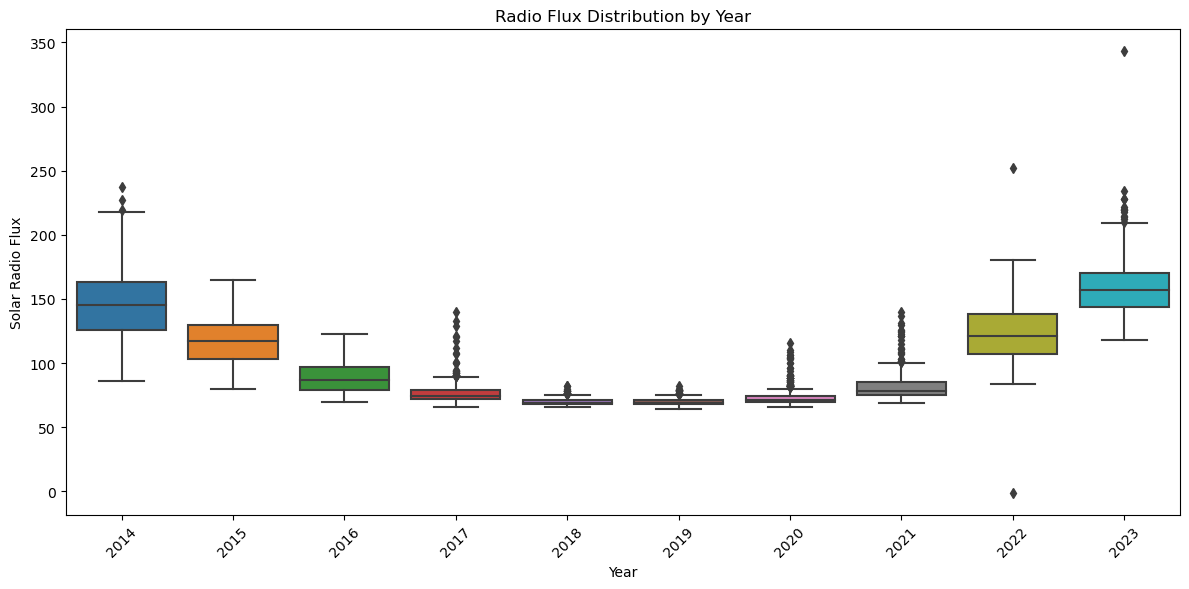

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

df_all['Date'] = pd.to_datetime(df_all['Date'])

df_all['Year'] = df_all['Date'].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='RadioFlux', data=df_all)

plt.title('Radio Flux Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Solar Radio Flux')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question2F

In [30]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_all, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")


Training set size: 2920
Testing set size: 730


### Question2G and H

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['SunspotNumber', 'Xray_C', 'Xray_M', 'Xray_X',
            'Optical_S', 'Optical_1', 'Optical_2', 'Optical_3']
target = 'RadioFlux'

train_clean = train_df.dropna(subset=features + [target])
test_clean = test_df.dropna(subset=features + [target])

X_train = train_clean[features]
y_train = train_clean[target]
X_test = test_clean[features]
y_test = test_clean[target]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R-squared:", round(r2, 4))

Mean Squared Error: 173.82
R-squared: 0.8644


The model predicts the solar radio flux quite well, with an R² score of approximately 0.86, indicating that about 86% of the variability in solar radio flux can be explained by sunspot number and solar flare activity.
The accuracy is good because solar activity indicators like sunspots and flares have a strong correlation with radio flux. However, the prediction is not perfect due to possible noise in the data or other influencing factors not included in the model.

### Question2I

In [37]:
import pandas as pd

input_data = pd.DataFrame([{
    'SunspotNumber': 96,
    'Xray_C': 1,
    'Xray_M': 0,
    'Xray_X': 0,
    'Optical_S': 0,
    'Optical_1': 0,
    'Optical_2': 0,
    'Optical_3': 0
}])

predicted_flux = model.predict(input_data)[0]
print(f"Predicted Solar Radio Flux: {predicted_flux:.2f}")


Predicted Solar Radio Flux: 122.72


The predicted solar radio flux for a day with 96 sunspots and a single C-class X-ray flare is approximately 122.72.

We are reasonably confident in this prediction because the model achieves a high R² score of approximately 0.86. However, the prediction is not perfect due to noise in the data and other influencing factors not captured in the model.